In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from jupyterthemes import jtplot
jtplot.reset()
warnings.filterwarnings("ignore")

In [286]:
#As few rows in spam df does not support'utf-8'.So i have to encode it into "latin1".

df = pd.read_csv("spam.csv", encoding= "latin1")
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [287]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [288]:
# Shape of dataset is 5572 rows × 5 columns
df.shape

(5572, 5)

### Stages:

1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Website
8. Deploy.

-  These are roughly all the stages needed to complete any ML project.

### 1.Data Cleaning

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [290]:
# Dropping last three columns 2 ways.

df.drop(df.iloc[:, 2:], inplace = True, axis = 1) #FIRST METHOD(Here i will use iloc method) #FIRST METHOD

# df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True) #SECOND METHOD

In [291]:
df.sample(5)

,v1,v2
422,ham,Siva is in hostel aha:-.
3736,ham,Plz note: if anyone calling from a mobile Co. ...
3381,ham,"Well, I meant as opposed to my drunken night o..."
2999,ham,Id onluy matters when getting on from offcampus
5168,ham,"IÛ÷ve got some salt, you can rub it in my ope..."


In [292]:
#Checking For Null Values

df.isnull().sum()

v1    0
v2    0
dtype: int64

In [293]:
# Renaming column v1 and v2.

df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
5551,ham,Wen did you get so spiritual and deep. That's ...
2072,ham,That is wondarfull song
5502,ham,Apo all other are mokka players only
3312,ham,"Huh... Hyde park not in mel ah, opps, got conf..."
5224,ham,\OH FUCK. JUSWOKE UP IN A BED ON A BOATIN THE ...


In [294]:
#Encode the target column ham and spam into 0 and 1.

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [295]:
df['target']= encoder.fit_transform(df['target'])

In [296]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [297]:
#Check for duplicate values.
df.duplicated().sum()

403

In [298]:
#Remove duplicate values.

df = df.drop_duplicates(keep='first') # "Keep first" will keep the first value from all duplicates.

In [299]:
df.duplicated().sum()

0

### 2.EDA(Exploratory Data Analysis)

In [300]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [301]:
# Check how many ham and spam values are there in the target column.
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

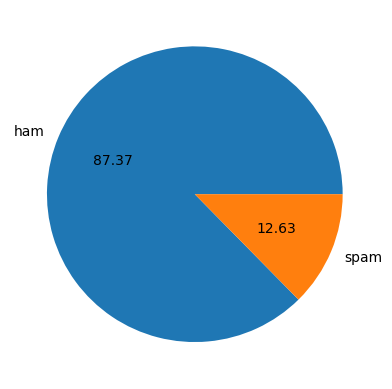

In [302]:
plt.pie(df['target'].value_counts(),labels = ["ham","spam"],autopct = "%0.2f")# "%0.2f" shows two values after decimal (ex 12.63)
plt.show()
#PIE SHOWS DATA IS IMBALANCED

In [303]:
#Import "nltk" an NLP library.
import nltk

In [304]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rohanpc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohanpc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [305]:
# Adding another column that show total number of characters used in a row.

df["num_characters"] = df['text'].apply(len)

In [306]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [307]:
# Fetching number of words using nltk library.
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))#nltk.word_tokenize break the text on the basis of words.

In [308]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [309]:
df["num_sentences"]= df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))#sent_tokenize break the text on the basis of sentence

In [310]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [311]:
#This will describe overall message.

df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [312]:
#This will only describe HAM message. 
#In df[] data frame the if column df["target"] == 0 the describe following columns.

df[df["target"] == 0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [313]:
#This will only describe SPAM message
#In df[] data frame the if column df["target"] == 1 the describe following columns.

df[df["target"] == 1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [314]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

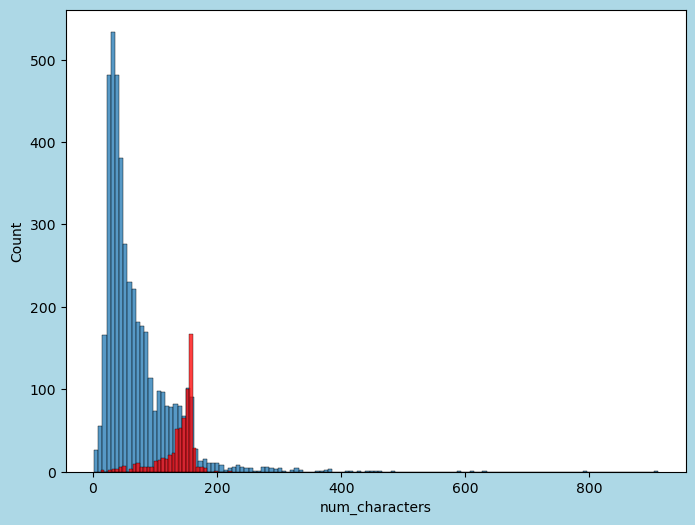

In [315]:
plt.figure(figsize=(8,6),facecolor = "lightblue")
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"],color="red")                                   

1)Most ham message consist of limited words.
2)Most spam message consist of many words.

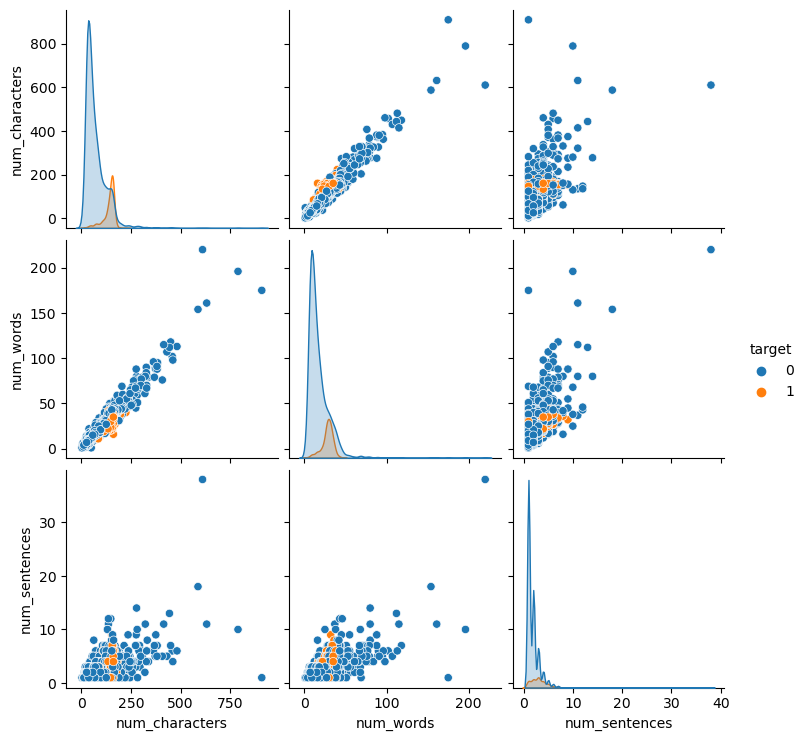

In [316]:
sns.pairplot(df,hue="target")

<AxesSubplot:>

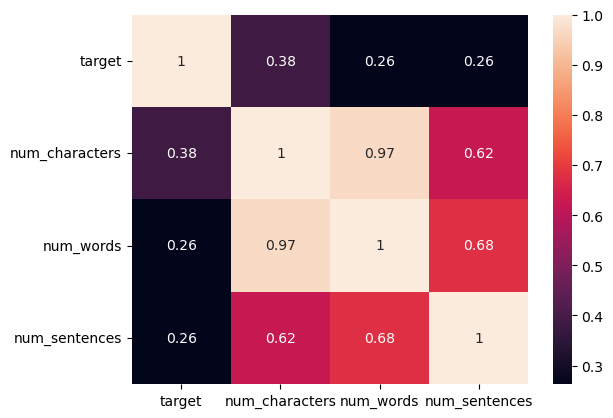

In [317]:
sns.heatmap(df.corr(),annot = True)

### 3.Text Preprocessing
1. Lower case
2. Tokenization.
2. Removing Special characters
4. Removing stop words(ex: is,or,the) and punctuation
5. Stemming(convert same type of words to a single word) like (dance,dancing,danced to dance)

In [318]:
#What are stop words?Words like is,the,you, that does not have some special meaning.

from nltk.corpus import stopwords
stopwords.words("english")[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [319]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [320]:
#Stemming import from nltk library.

from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('dancing')

'danc'

In [321]:
# Make a function to perform all the 5 tasks in text preprocessing.

def transform_text(text):
    text = text.lower() #1. Lower case
    
    text = nltk.word_tokenize(text) #2.Convert hi how are to ('hi','how','are') tokenization
    
    
    y=[]                            #3.Removing special characters like(@,#,% rtc)
    for i in text:
        if i.isalnum():
            y.append(i)
          
    text = y[:]                      #4. Removing stopwords and special characters.
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text = y[:]                      #5. Stemming
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " " .join(y)

    

In [322]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [323]:
df["text"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [324]:
# Apply transfor text function on our dataset.

df["transformed_text"] = df["text"].apply(transform_text)

In [325]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [326]:
#Importing word cloud to make a word cloud figure for ham and spam. It shows frequently used word in big.
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

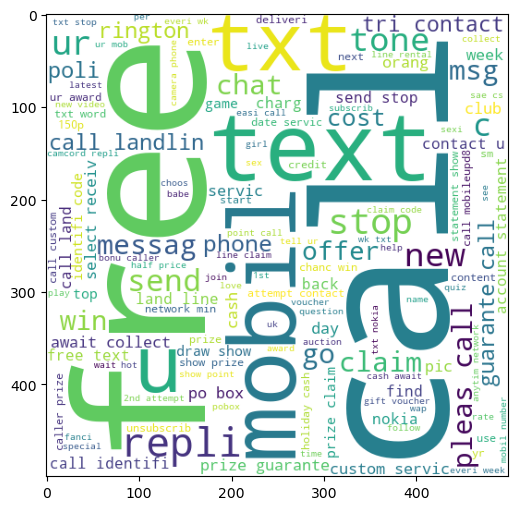

In [327]:
#WordCloud for spam.

spam_wc = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep = ""))
plt.figure(figsize=(14,6))
plt.imshow(spam_wc)

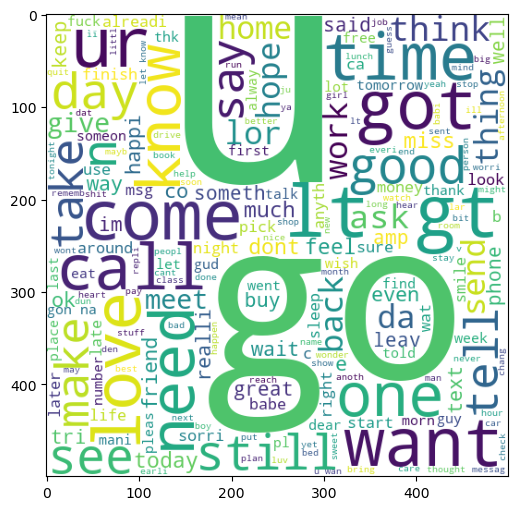

In [328]:
#Ham wordcloud.
ham_wc = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep = ""))
plt.figure(figsize=(14,6))
plt.imshow(ham_wc)

In [329]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [330]:
word = df[df["target"] == 1]["transformed_text"]

In [331]:
#Function for spam words.

spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [332]:
spam_corpus[:10]

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt']

In [333]:
len(spam_corpus)

9939

In [334]:
#Counter is used to count how many times a word appeared.
#Most common will give the frequent used words.
from collections import Counter

Counter(spam_corpus).most_common(5)

[('call', 320), ('free', 191), ('2', 155), ('txt', 141), ('text', 122)]

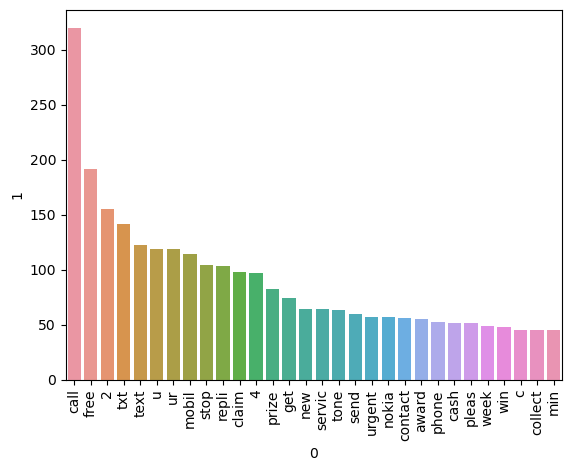

In [335]:
#Plotting spam most_common words.

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [336]:
# Function for ham words.
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [337]:
ham_corpus[:10]

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la']

In [338]:
len(ham_corpus)

35404

In [339]:
#Most common words used in ham.

Counter(ham_corpus).most_common(5)

[('u', 883), ('go', 404), ('get', 349), ('gt', 288), ('lt', 287)]

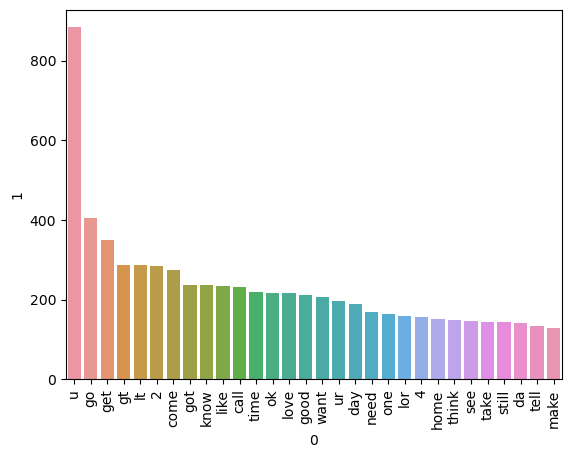

In [340]:
#Plot ham's most common words.

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 4.Model Building

In [386]:
#Importing two types of vectorizer and use them to see which one performs better.

from sklearn.feature_extraction.text import  CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 30000)

In [387]:
# We will use tfidf vectorizer as it is giving higher precision then the CountVectorizer.

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [388]:
#Vectorizer transformed text into numbers.
X 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [389]:
y = df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [390]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [391]:
#Importing naive bayes algo. Best for this kind of dataset.

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB # ML MODEL(Fit data to the model)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score # PRECISION SCORE(How good model performs)

In [392]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [393]:
#Gaussian naivebayes

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

#Calculate Precision

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [394]:
#Multinomial naivebayes

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

#Calculate Precision

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [395]:
#Bernoulli naivebayes

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

#Calculate Precision

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [396]:
#Import all the type of classifier to run and test our models.

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [397]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [398]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [399]:
#This function will train model on different classifier.

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [400]:
train_classifier(xgb, X_train, y_train, X_test, y_test)

(0.9700193423597679, 0.9349593495934959)

In [401]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For: ", name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For:  SVC
Accuracy:  0.9729206963249516
Precision:  0.9741379310344828
For:  KN
Accuracy:  0.9003868471953579
Precision:  1.0
For:  NB
Accuracy:  0.9593810444874274
Precision:  1.0
For:  DT
Accuracy:  0.937137330754352
Precision:  0.8543689320388349
For:  LR
Accuracy:  0.9516441005802708
Precision:  0.94
For:  RF
Accuracy:  0.971953578336557
Precision:  1.0
For:  AdaBoost
Accuracy:  0.9613152804642167
Precision:  0.9454545454545454
For:  BgC
Accuracy:  0.9584139264990329
Precision:  0.8625954198473282
For:  ETC
Accuracy:  0.9729206963249516
Precision:  0.9824561403508771
For:  GBDT
Accuracy:  0.9526112185686654
Precision:  0.9238095238095239
For:  xgb
Accuracy:  0.9700193423597679
Precision:  0.9349593495934959


In [402]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending = False)

In [403]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.970019,0.934959
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [408]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.970019
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


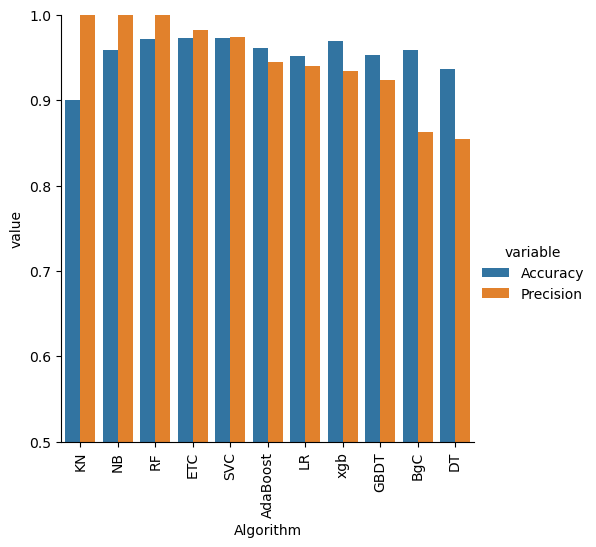

In [407]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [409]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))